## 1. Wybór zbioru danych i problemu

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [30]:
data_path = 'dataset.csv'
df = pd.read_csv(data_path)

In [31]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [32]:
df['stroke'].value_counts()

,count
stroke,
0,42617
1,783


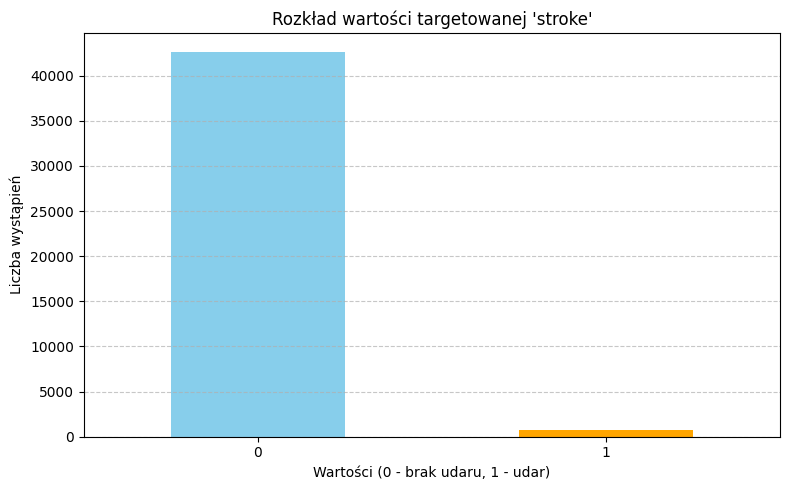

In [33]:
value_counts = df['stroke'].value_counts()


value_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 5))
plt.title("Rozkład wartości targetowanej 'stroke'")
plt.xlabel("Wartości (0 - brak udaru, 1 - udar)")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [35]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 id                                   0
age                                  0
hypertension                         0
heart_disease                        0
avg_glucose_level                    0
bmi                               1462
stroke                               0
gender_Female                        0
gender_Male                          0
gender_Other                         0
ever_married_No                      0
ever_married_Yes                     0
work_type_Govt_job                   0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
Residence_type_Rural                 0
Residence_type_Urban                 0
smoking_status_formerly smoked       0
smoking_status_never smoked          0
smoking_status_smokes                0
dtype: int64


In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
tab = imputer.fit_transform(df)
df_new = pd.DataFrame(tab, columns=df.columns)
df_new.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,46136.0,14.0,0.0,0.0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,32257.0,47.0,0.0,0.0,210.95,50.1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,52800.0,52.0,0.0,0.0,77.59,17.7,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,41413.0,75.0,0.0,1.0,243.53,27.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,15266.0,32.0,0.0,0.0,77.67,32.3,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,28674.0,74.0,1.0,0.0,205.84,54.6,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
df_new.isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
stroke,0
gender_Female,0
gender_Male,0
gender_Other,0


In [38]:
X = df_new.drop('stroke',axis=1)
y = df_new['stroke']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [40]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)

In [41]:
from imblearn.over_sampling import SMOTE

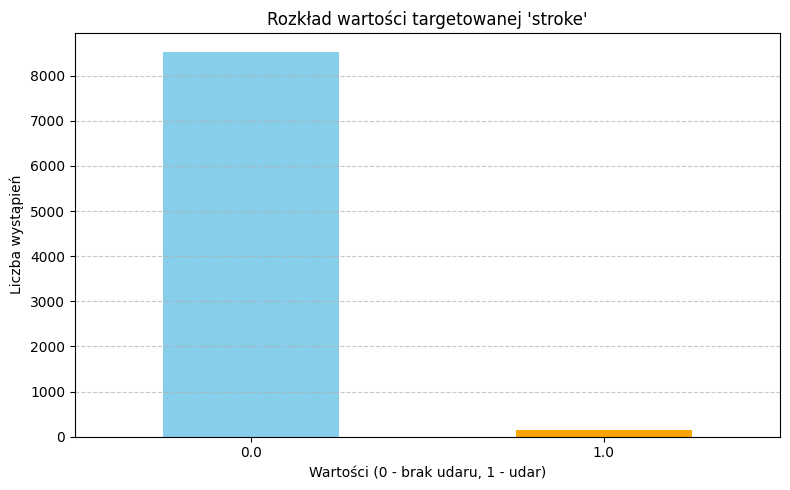

In [42]:
value_counts = y_test.value_counts()


value_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 5))
plt.title("Rozkład wartości targetowanej 'stroke'")
plt.xlabel("Wartości (0 - brak udaru, 1 - udar)")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2. Metody do porównania
Porównaj SOAP z następującymi funkcjami kosztu z zadania 1:

- Weighted Cross-Entropy Loss
- Focal Loss
- Class-Balanced Loss
- Tversky Loss

In [43]:
class ImprovedModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),  # Więcej neuronów w pierwszej warstwie
            nn.BatchNorm1d(128),         # Batch Normalization
            nn.LeakyReLU(),              # LeakyReLU zamiast ReLU
            nn.Dropout(0.3),             # Dropout z prawdopodobieństwem 0.3

            nn.Linear(128, 64),          # Druga warstwa
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)             # Wyjście (1 neuron - klasyfikacja binarna)
        )

    def forward(self, x):
        return self.fc(x)


In [44]:
def train_and_evaluate_model(criterion):
    model = ImprovedModel(input_size=X_train.shape[1])
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    best_auprc = 0
    best_model_state = None
    losses = []

    for epoch in range(300):
        model.train()
        optimizer.zero_grad()

        logits = model(torch.tensor(X_train.values, dtype=torch.float32))
        loss = criterion(logits, torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Ewaluacja modelu
    model.eval()
    with torch.no_grad():
        logits = model(torch.tensor(X_test.values, dtype=torch.float32)).squeeze()
        preds = torch.sigmoid(logits).numpy()

        # Prognozy binarne z różnymi progami
        for threshold in [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
            preds_binary = (preds >= threshold).astype(int)
            print(f"Threshold: {threshold}")
            print(classification_report(y_test, preds_binary, target_names=['No Stroke', 'Stroke']))

            # Obliczanie AUROC i AUPRC
            auc = roc_auc_score(y_test, preds_binary)
            print(f"AUROC: {auc}")

            auprc = average_precision_score(y_test, preds_binary)
            print(f"AUPRC: {auprc}")

            if auprc > best_auprc:
                best_auprc = auprc
                best_model_state = model.state_dict()

    # Wyświetlanie wyników
    print("Best AUPRC:", best_auprc)


    plt.plot(losses)
    plt.title("Loss per epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Zwracanie najlepszego modelu
    model.load_state_dict(best_model_state)
    return model


### Weighted Cross-Entropy Loss

In [45]:
import torch
import torch.nn as nn

# Waga klas na podstawie rozkładu
pos_weight = torch.tensor([len(y_test) / y_test.value_counts()[1]], dtype=torch.float)
criterion_wce = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       1.00      0.11      0.20      8523
      Stroke       0.02      0.99      0.04       157

    accuracy                           0.13      8680
   macro avg       0.51      0.55      0.12      8680
weighted avg       0.98      0.13      0.20      8680

AUROC: 0.5533094788100539
AUPRC: 0.0202041614202848
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       1.00      0.26      0.41      8523
      Stroke       0.02      0.99      0.05       157

    accuracy                           0.27      8680
   macro avg       0.51      0.62      0.23      8680
weighted avg       0.98      0.27      0.40      8680

AUROC: 0.6246458627124356
AUPRC: 0.02396234113123367
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       1.00      0.29      0.45      8523
      Stroke       0.03      0.99      0.05       157

    accuracy                 

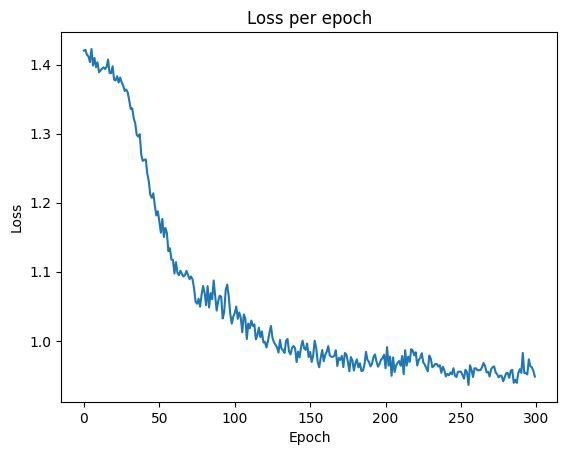

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [46]:
train_and_evaluate_model(criterion_wce)

### Focal Loss

In [47]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, pos_weight=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.pos_weight = pos_weight

    def forward(self, logits, targets):
        probs = torch.sigmoid(logits)
        targets = targets.float()
        bce_loss = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)(logits, targets)
        pt = torch.exp(-bce_loss)  # Prawdopodobieństwo poprawnie przewidziane
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss


In [48]:
criterion_focal = FocalLoss(alpha=0.75, gamma=2)


Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       0.00      0.00      0.00      8523
      Stroke       0.02      1.00      0.04       157

    accuracy                           0.02      8680
   macro avg       0.01      0.50      0.02      8680
weighted avg       0.00      0.02      0.00      8680

AUROC: 0.5
AUPRC: 0.018087557603686636
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       1.00      0.18      0.31      8523
      Stroke       0.02      0.98      0.04       157

    accuracy                           0.20      8680
   macro avg       0.51      0.58      0.18      8680
weighted avg       0.98      0.20      0.31      8680

AUROC: 0.5827255735884392
AUPRC: 0.02160932212555389
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.99      0.51      0.67      8523
      Stroke       0.03      0.80      0.06       157

    accuracy                           0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

AUROC: 0.5
AUPRC: 0.018087557603686636
Threshold: 0.6
              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

AUROC: 0.5
AUPRC: 0.018087557603686636
Threshold: 0.7
              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

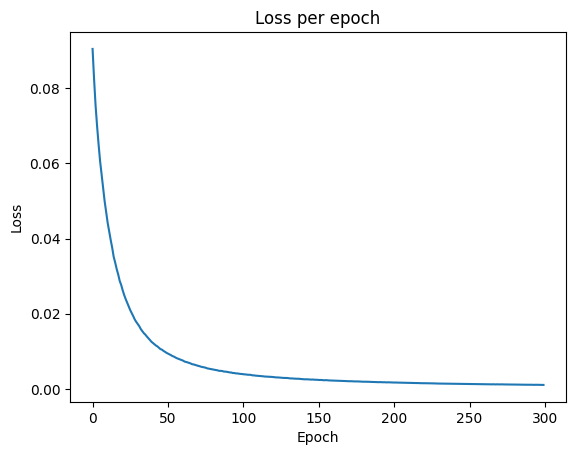

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [49]:
train_and_evaluate_model(criterion_focal)

### Class-Balanced Loss

In [50]:
# Wybieramy beta i liczymy wagi klas
beta = 0.99
effective_num = 1.0 - np.power(beta, y.value_counts().sort_index())
class_weights_cb = (1.0 - beta) / effective_num
class_weights_cb /= class_weights_cb.sum()  # Normalizacja wag


class ClassBalancedLoss(nn.Module):
    def __init__(self, weights):
        super().__init__()
        self.weights = torch.tensor(weights, dtype=torch.float32)

    def forward(self, logits, labels):
        # Przeniesienie wag na to samo urządzenie co logits
        weights = self.weights.to(logits.device)
        # Obliczenie straty
        criterion = nn.BCEWithLogitsLoss(pos_weight=weights[1])
        return criterion(logits, labels)


criterion_cb = ClassBalancedLoss(class_weights_cb)


Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       1.00      0.39      0.56      8523
      Stroke       0.03      0.93      0.05       157

    accuracy                           0.40      8680
   macro avg       0.51      0.66      0.31      8680
weighted avg       0.98      0.40      0.55      8680

AUROC: 0.6596765888629568
AUPRC: 0.02664498215962493
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       0.98      0.99      0.99      8523
      Stroke       0.06      0.04      0.05       157

    accuracy                           0.97      8680
   macro avg       0.52      0.51      0.52      8680
weighted avg       0.97      0.97      0.97      8680

AUROC: 0.5138871139987639
AUPRC: 0.019809990869921877
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.17      0.01      0.01       157

    accuracy               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

AUROC: 0.5
AUPRC: 0.018087557603686636
Threshold: 0.6
              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

AUROC: 0.5
AUPRC: 0.018087557603686636
Threshold: 0.7
              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      8523
      Stroke       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0

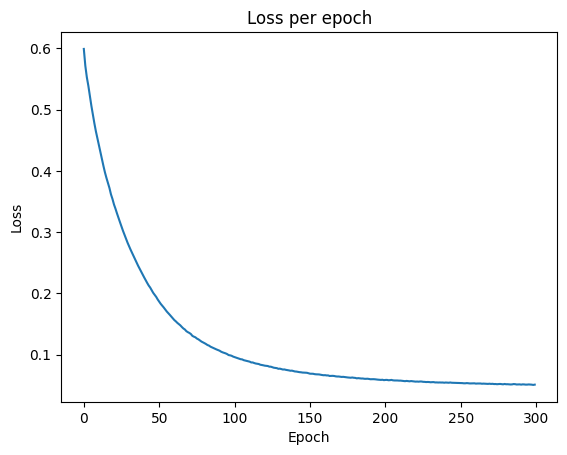

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [51]:
train_and_evaluate_model(criterion_cb)

### Tversky Loss

In [52]:
class TverskyLoss(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5):
        super().__init__()
        self.alpha = alpha
        self.beta = beta

    def forward(self, logits, labels):
        probs = torch.sigmoid(logits)
        tp = (probs * labels).sum(dim=0)
        fp = ((1 - labels) * probs).sum(dim=0)
        fn = (labels * (1 - probs)).sum(dim=0)
        tversky = tp / (tp + self.alpha * fp + self.beta * fn + 1e-7)
        return 1 - tversky.mean()

criterion_tversky = TverskyLoss(alpha=0.9, beta=0.1)

Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       0.99      0.53      0.69      8523
      Stroke       0.03      0.73      0.05       157

    accuracy                           0.54      8680
   macro avg       0.51      0.63      0.37      8680
weighted avg       0.97      0.54      0.68      8680

AUROC: 0.6302167757383357
AUPRC: 0.025227507563474555
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       0.99      0.65      0.78      8523
      Stroke       0.03      0.66      0.06       157

    accuracy                           0.65      8680
   macro avg       0.51      0.66      0.42      8680
weighted avg       0.97      0.65      0.77      8680

AUROC: 0.6551571581131909
AUPRC: 0.028293340137749243
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.99      0.67      0.80      8523
      Stroke       0.03      0.62      0.06       157

    accuracy              

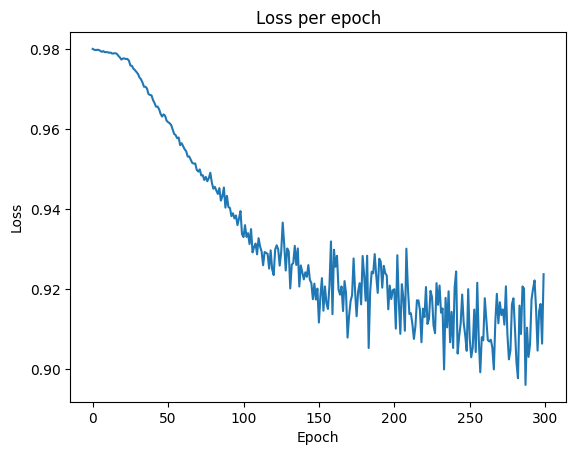

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [53]:
train_and_evaluate_model(criterion_tversky)

### SOAP

In [54]:
!pip install libauc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.3 MB/s eta 0:00:00


In [55]:
from libauc.losses import AUCMLoss
from libauc.optimizers import SOAP

criterion_soap = AUCMLoss(margin=3)  # Loss dla AUPRC

In [56]:
def train_and_evaluate_soap_model(criterion):
    model_soap = ImprovedModel(input_size=X_train.shape[1])
    optimizer_soap = SOAP(model_soap.parameters(), lr=0.01, mode='adam')  # Optymalizator SOAP

    best_auprc = 0
    best_model_state = None
    losses = []

    for epoch in range(100):
        model_soap.train()

        optimizer_soap.zero_grad()
        logits = model_soap(torch.tensor(X_train.values, dtype=torch.float32))
        loss = criterion(logits, torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1))

        loss.backward()
        optimizer_soap.step()
        losses.append(loss.item())

        # Ewaluacja w trakcie treningu na podstawie ciągłych prognoz
        model_soap.eval()
        with torch.no_grad():
            val_logits = model_soap(torch.tensor(X_test.values, dtype=torch.float32)).squeeze()
            val_preds = torch.sigmoid(val_logits).numpy()

            # Obliczanie AUROC i AUPRC na podstawie ciągłych prognoz
            val_auc = roc_auc_score(y_test, val_preds)
            val_auprc = average_precision_score(y_test, val_preds)

            if val_auprc > best_auprc:
                best_auprc = val_auprc
                best_model_state = model_soap.state_dict()

        print(f"Epoch {epoch+1}: Loss = {loss.item()}, Val AUROC = {val_auc}, Val AUPRC = {val_auprc}")

    print("Best AUPRC:", best_auprc)

    # Ładowanie najlepszego stanu modelu
    if best_model_state:
        model_soap.load_state_dict(best_model_state)

    # Ostateczna ewaluacja
    model_soap.eval()
    with torch.no_grad():
        final_logits = model_soap(torch.tensor(X_test.values, dtype=torch.float32)).squeeze()
        final_preds = torch.sigmoid(final_logits).numpy()

        # Binarny próg decyzyjny
        threshold = 0.5
        binary_preds = (final_preds >= threshold).astype(int)

        # Szczegółowy raport klasyfikacji
        report = classification_report(y_test, binary_preds, target_names=["No Stroke", "Stroke"])
        print("Classification Report:")
        print(report)

    plt.plot(losses)
    plt.title("Loss per epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    return model_soap

Epoch 1: Loss = 0.005429071374237537, Val AUROC = 0.5156123072002248, Val AUPRC = 0.02064053299113116
Epoch 2: Loss = 0.024410106241703033, Val AUROC = 0.5494323714549839, Val AUPRC = 0.02232282859227046
Epoch 3: Loss = 0.002966736676171422, Val AUROC = 0.48537415804817385, Val AUPRC = 0.01827442700108272
Epoch 4: Loss = 0.004436645656824112, Val AUROC = 0.48475051770742494, Val AUPRC = 0.0175685837122339
Epoch 5: Loss = 0.003925570286810398, Val AUROC = 0.4825205083883176, Val AUPRC = 0.023603656745177455
Epoch 6: Loss = 0.0023111156187951565, Val AUROC = 0.4825993508759736, Val AUPRC = 0.018630481602780757
Epoch 7: Loss = 0.0015458224806934595, Val AUROC = 0.505405007506851, Val AUPRC = 0.021292271678405934
Epoch 8: Loss = 0.0013054830487817526, Val AUROC = 0.5371449005351574, Val AUPRC = 0.021830638996534958
Epoch 9: Loss = 0.0012462812010198832, Val AUROC = 0.5136954258652683, Val AUPRC = 0.01933220517351717
Epoch 10: Loss = 0.0011358559131622314, Val AUROC = 0.49246064041024995, V

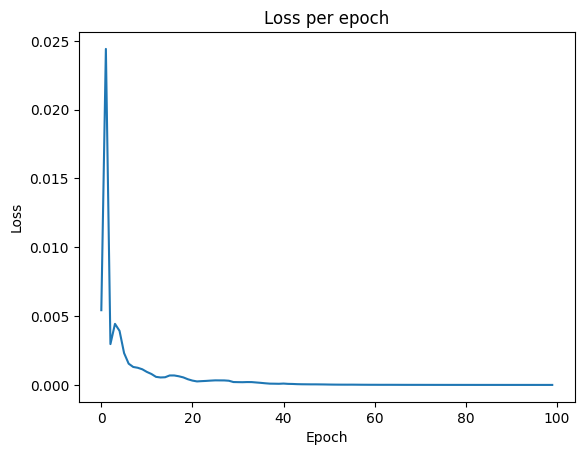

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [57]:
train_and_evaluate_soap_model(criterion_soap)

# Zadanie 3

## Oversampling

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
X_train, X_temp, y_test, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [60]:
from imblearn.over_sampling import SMOTE

sampling_strategy = 0.5  # Klasa mniejszościowa będzie stanowić 50% klasy większościowej
os = SMOTE(sampling_strategy=sampling_strategy, random_state=1)

X_train, y_train = os.fit_resample(X_train, y_train)

In [61]:
type(X_train)

pandas.core.frame.DataFrame

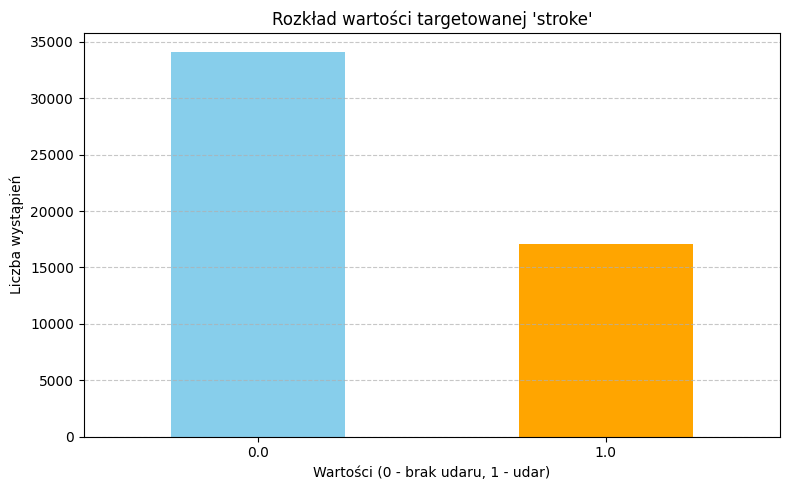

In [63]:
value_counts = y_train.value_counts()


value_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 5))
plt.title("Rozkład wartości targetowanej 'stroke'")
plt.xlabel("Wartości (0 - brak udaru, 1 - udar)")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       0.00      0.00      0.00      8523
      Stroke       0.33      1.00      0.50      4261

    accuracy                           0.33     12784
   macro avg       0.17      0.50      0.25     12784
weighted avg       0.11      0.33      0.17     12784

AUROC: 0.5
AUPRC: 0.3333072590738423
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       0.95      0.01      0.02      8523
      Stroke       0.33      1.00      0.50      4261

    accuracy                           0.34     12784
   macro avg       0.64      0.50      0.26     12784
weighted avg       0.74      0.34      0.18     12784

AUROC: 0.5036958266604028
AUPRC: 0.3349579265208553
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.98      0.05      0.10      8523
      Stroke       0.35      1.00      0.51      4261

    accuracy                           0.37  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   No Stroke       0.95      0.55      0.70      8523
      Stroke       0.51      0.94      0.66      4261

    accuracy                           0.68     12784
   macro avg       0.73      0.75      0.68     12784
weighted avg       0.80      0.68      0.69     12784

AUROC: 0.7465061545160336
AUPRC: 0.5013914345961954
Threshold: 0.5
              precision    recall  f1-score   support

   No Stroke       0.93      0.61      0.74      8523
      Stroke       0.54      0.91      0.68      4261

    accuracy                           0.71     12784
   macro avg       0.73      0.76      0.71     12784
weighted avg       0.80      0.71      0.72     12784

AUROC: 0.7593515543057656
AUPRC: 0.5196492387099398
Threshold: 0.6
              precision    recall  f1-score   support

   No Stroke       0.91      0.67      0.77      8523
      Stroke       0.56      0.86      0.68      4261

    accuracy                           0.73     

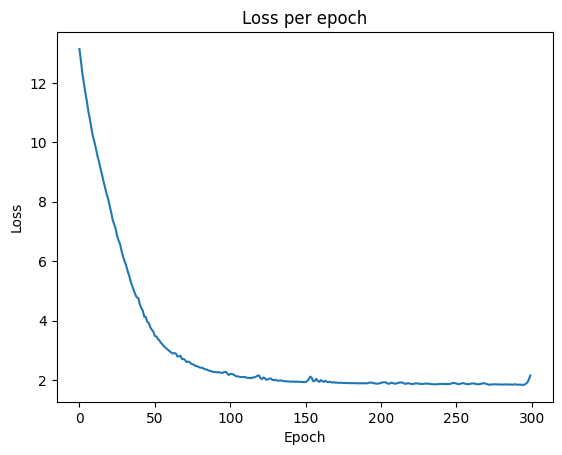

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [66]:
train_and_evaluate_model(criterion_wce)

Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       0.99      0.23      0.37      8523
      Stroke       0.39      1.00      0.56      4261

    accuracy                           0.48     12784
   macro avg       0.69      0.61      0.47     12784
weighted avg       0.79      0.48      0.43     12784

AUROC: 0.6124015987993117
AUPRC: 0.3920927526665658
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       0.98      0.39      0.56      8523
      Stroke       0.45      0.99      0.62      4261

    accuracy                           0.59     12784
   macro avg       0.72      0.69      0.59     12784
weighted avg       0.81      0.59      0.58     12784

AUROC: 0.6910704893585156
AUPRC: 0.4477473481345414
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.98      0.43      0.60      8523
      Stroke       0.46      0.98      0.63      4261

    accuracy                  

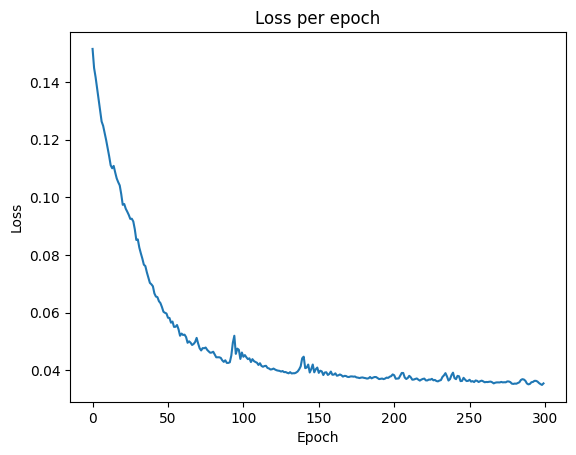

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [67]:
train_and_evaluate_model(criterion_focal)

Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       0.99      0.34      0.51      8523
      Stroke       0.43      0.99      0.60      4261

    accuracy                           0.56     12784
   macro avg       0.71      0.67      0.55     12784
weighted avg       0.80      0.56      0.54     12784

AUROC: 0.666431429259585
AUPRC: 0.428640614544044
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       0.96      0.52      0.68      8523
      Stroke       0.50      0.96      0.66      4261

    accuracy                           0.67     12784
   macro avg       0.73      0.74      0.67     12784
weighted avg       0.81      0.67      0.67     12784

AUROC: 0.7426352421652492
AUPRC: 0.49592483156002726
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.95      0.57      0.72      8523
      Stroke       0.52      0.94      0.67      4261

    accuracy                   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


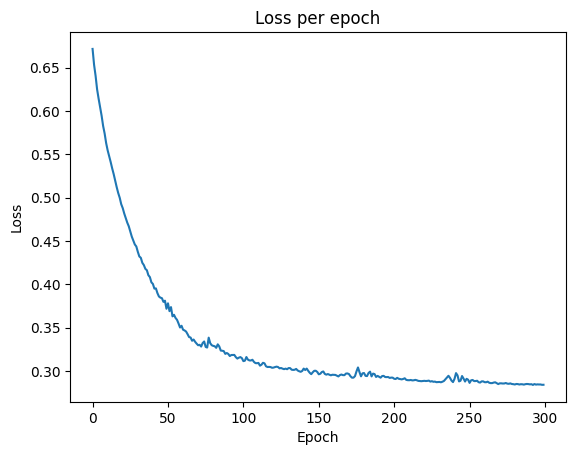

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [68]:
train_and_evaluate_model(criterion_cb)

Threshold: 0.01
              precision    recall  f1-score   support

   No Stroke       0.90      0.72      0.80      8523
      Stroke       0.60      0.84      0.70      4261

    accuracy                           0.76     12784
   macro avg       0.75      0.78      0.75     12784
weighted avg       0.80      0.76      0.77     12784

AUROC: 0.7805845871228295
AUPRC: 0.557112292912989
Threshold: 0.05
              precision    recall  f1-score   support

   No Stroke       0.87      0.78      0.83      8523
      Stroke       0.64      0.77      0.70      4261

    accuracy                           0.78     12784
   macro avg       0.76      0.78      0.76     12784
weighted avg       0.79      0.78      0.78     12784

AUROC: 0.7761802671364035
AUPRC: 0.5688867531350971
Threshold: 0.07
              precision    recall  f1-score   support

   No Stroke       0.87      0.80      0.83      8523
      Stroke       0.65      0.76      0.70      4261

    accuracy                   

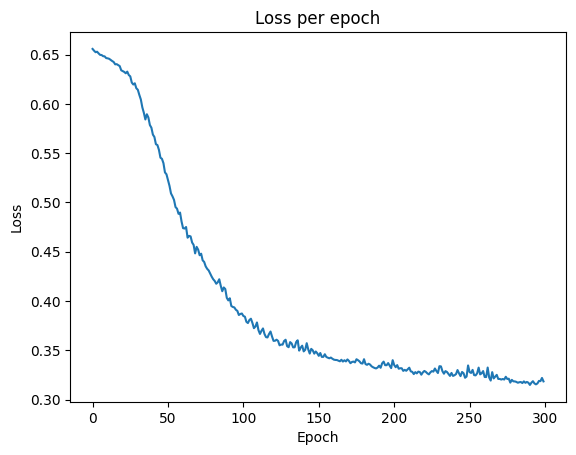

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [69]:
train_and_evaluate_model(criterion_tversky)

Epoch 1: Loss = 0.07266905903816223, Val AUROC = 0.5191360935825787, Val AUPRC = 0.3354708150860613
Epoch 2: Loss = 0.478370726108551, Val AUROC = 0.5224658883042786, Val AUPRC = 0.33600149967503323
Epoch 3: Loss = 0.14438825845718384, Val AUROC = 0.47983787150431306, Val AUPRC = 0.31668309811070816
Epoch 4: Loss = 0.039417244493961334, Val AUROC = 0.4789412268025916, Val AUPRC = 0.323240650546835
Epoch 5: Loss = 0.03231845796108246, Val AUROC = 0.4779701393606097, Val AUPRC = 0.31212968967036026
Epoch 6: Loss = 0.05501372739672661, Val AUROC = 0.48465219792775754, Val AUPRC = 0.31206651943272734
Epoch 7: Loss = 0.05408864840865135, Val AUROC = 0.48750120571906386, Val AUPRC = 0.3195539969295295
Epoch 8: Loss = 0.03849666565656662, Val AUROC = 0.48577299692098663, Val AUPRC = 0.3193450942256646
Epoch 9: Loss = 0.024010902270674706, Val AUROC = 0.4803489201589701, Val AUPRC = 0.31362871425857564
Epoch 10: Loss = 0.0155599070712924, Val AUROC = 0.47840240840369463, Val AUPRC = 0.32139387

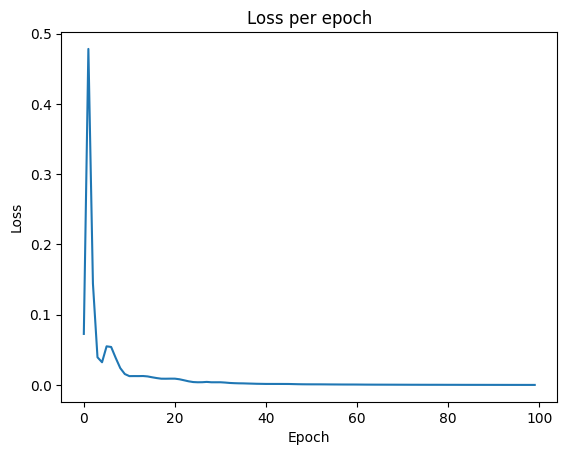

ImprovedModel(
  (fc): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [70]:
train_and_evaluate_soap_model(criterion_soap)